## 1. Use breast cancer data set

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [7]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
X = cancer.data
y = cancer.target

n_features = X.shape[1]
n_targets = y.shape[0]
print(n_features, n_targets)

30 569


##### --> 569 instances, 30 features and 569 targets.

In [9]:
counts = np.bincount(y)
print(counts[0], counts[1])

212 357


##### --> 212 instances of class 0 and 357 instances of class 1 --> the data is a bit imbalanced
majority class is the one with most instances

## 2. Split this dataset to training data and testing data.

##### a. We would use random split because it helps us ensure that the training and testing sets are representative of the overall dataset.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 3. Decrease the ratio of training data to the whole dataset from 95% to 5% gradually and every change is 5% (i.e., 95, 90, 85, …, 10, 5%, and testing data is 5~95%).

Train size: 95%, Test size: 5%
Decision Tree: Accuracy=0.97, Recall=0.95, F1-score=0.97
Random Forest: Accuracy=0.90, Recall=0.85, F1-score=0.92
XGBoost: Accuracy=0.97, Recall=0.95, F1-score=0.97
SVC: Accuracy=0.90, Recall=0.95, F1-score=0.93
KNN: Accuracy=0.86, Recall=0.85, F1-score=0.89
Logistic Regression: Accuracy=0.93, Recall=0.90, F1-score=0.95

Train size: 90%, Test size: 10%
Decision Tree: Accuracy=0.88, Recall=0.83, F1-score=0.89
Random Forest: Accuracy=0.93, Recall=0.91, F1-score=0.94
XGBoost: Accuracy=0.95, Recall=0.94, F1-score=0.96
SVC: Accuracy=0.93, Recall=0.97, F1-score=0.94
KNN: Accuracy=0.89, Recall=0.89, F1-score=0.91
Logistic Regression: Accuracy=0.95, Recall=0.91, F1-score=0.96

Train size: 85%, Test size: 15%
Decision Tree: Accuracy=0.93, Recall=0.90, F1-score=0.94
Random Forest: Accuracy=0.97, Recall=0.96, F1-score=0.97
XGBoost: Accuracy=0.98, Recall=0.98, F1-score=0.98
SVC: Accuracy=0.93, Recall=0.98, F1-score=0.94
KNN: Accuracy=0.92, Recall=0.92, F1-score=0.93


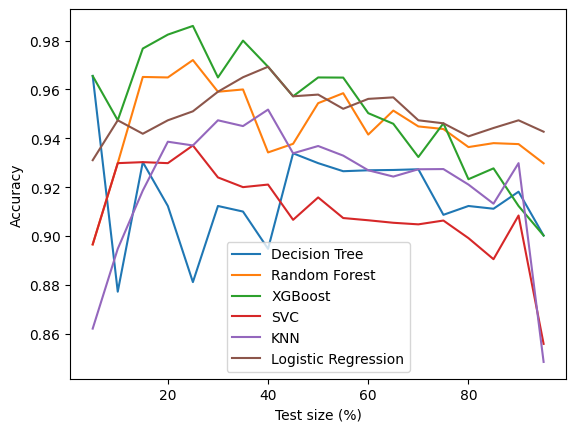

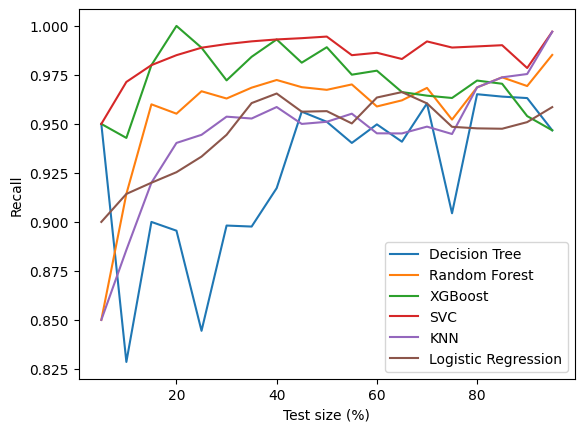

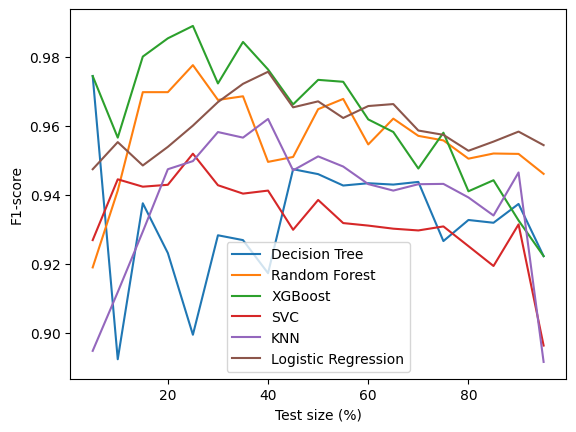

In [15]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'XGBoost': XGBClassifier(random_state=0),
    'SVC': SVC(random_state=0),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=0, solver='newton-cg', max_iter=1000)
}
train_sizes = list(range(95, 0, -5))
test_sizes = [100 - train_size for train_size in train_sizes]
performance_metrics = ['Accuracy', 'Recall', 'F1-score']
model_performance = {model_name: {metric: [] for metric in performance_metrics} for model_name in models.keys()}

for train_size in train_sizes:
    test_size = 100 - train_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, test_size=test_size/100, random_state=0)

    print(f'Train size: {train_size}%, Test size: {test_size}%')

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f'{model_name}: Accuracy={accuracy:.2f}, Recall={recall:.2f}, F1-score={f1:.2f}')
        model_performance[model_name]['Accuracy'].append(accuracy)
        model_performance[model_name]['Recall'].append(recall)
        model_performance[model_name]['F1-score'].append(f1)

    print()

for metric in performance_metrics:
    plt.figure()
    for model_name in models.keys():
        plt.plot(test_sizes, model_performance[model_name][metric], label=model_name)
    plt.xlabel('Test size (%)')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

In [17]:
from itertools import combinations
from scipy.stats import ttest_rel

model_names = list(models.keys())
p_values = {metric: {f'{model1} vs {model2}': None for model1, model2 in combinations(model_names, 2)} for metric in performance_metrics}

for metric in performance_metrics:
    for model1, model2 in combinations(model_names, 2):
        model1_performance = model_performance[model1][metric]
        model2_performance = model_performance[model2][metric]
        t_stat, p_value = ttest_rel(model1_performance, model2_performance)
        p_values[metric][f'{model1} vs {model2}'] = p_value

for metric in performance_metrics:
    print(f'{metric}:')
    for model_pair, p_value in p_values[metric].items():
        print(f'  {model_pair}: p-value={p_value:.3f}')
    print()

Accuracy:
  Decision Tree vs Random Forest: p-value=0.001
  Decision Tree vs XGBoost: p-value=0.000
  Decision Tree vs SVC: p-value=0.416
  Decision Tree vs KNN: p-value=0.485
  Decision Tree vs Logistic Regression: p-value=0.000
  Random Forest vs XGBoost: p-value=0.161
  Random Forest vs SVC: p-value=0.000
  Random Forest vs KNN: p-value=0.000
  Random Forest vs Logistic Regression: p-value=0.143
  XGBoost vs SVC: p-value=0.000
  XGBoost vs KNN: p-value=0.000
  XGBoost vs Logistic Regression: p-value=0.715
  SVC vs KNN: p-value=0.020
  SVC vs Logistic Regression: p-value=0.000
  KNN vs Logistic Regression: p-value=0.000

Recall:
  Decision Tree vs Random Forest: p-value=0.006
  Decision Tree vs XGBoost: p-value=0.000
  Decision Tree vs SVC: p-value=0.000
  Decision Tree vs KNN: p-value=0.045
  Decision Tree vs Logistic Regression: p-value=0.020
  Random Forest vs XGBoost: p-value=0.032
  Random Forest vs SVC: p-value=0.000
  Random Forest vs KNN: p-value=0.000
  Random Forest vs Logi

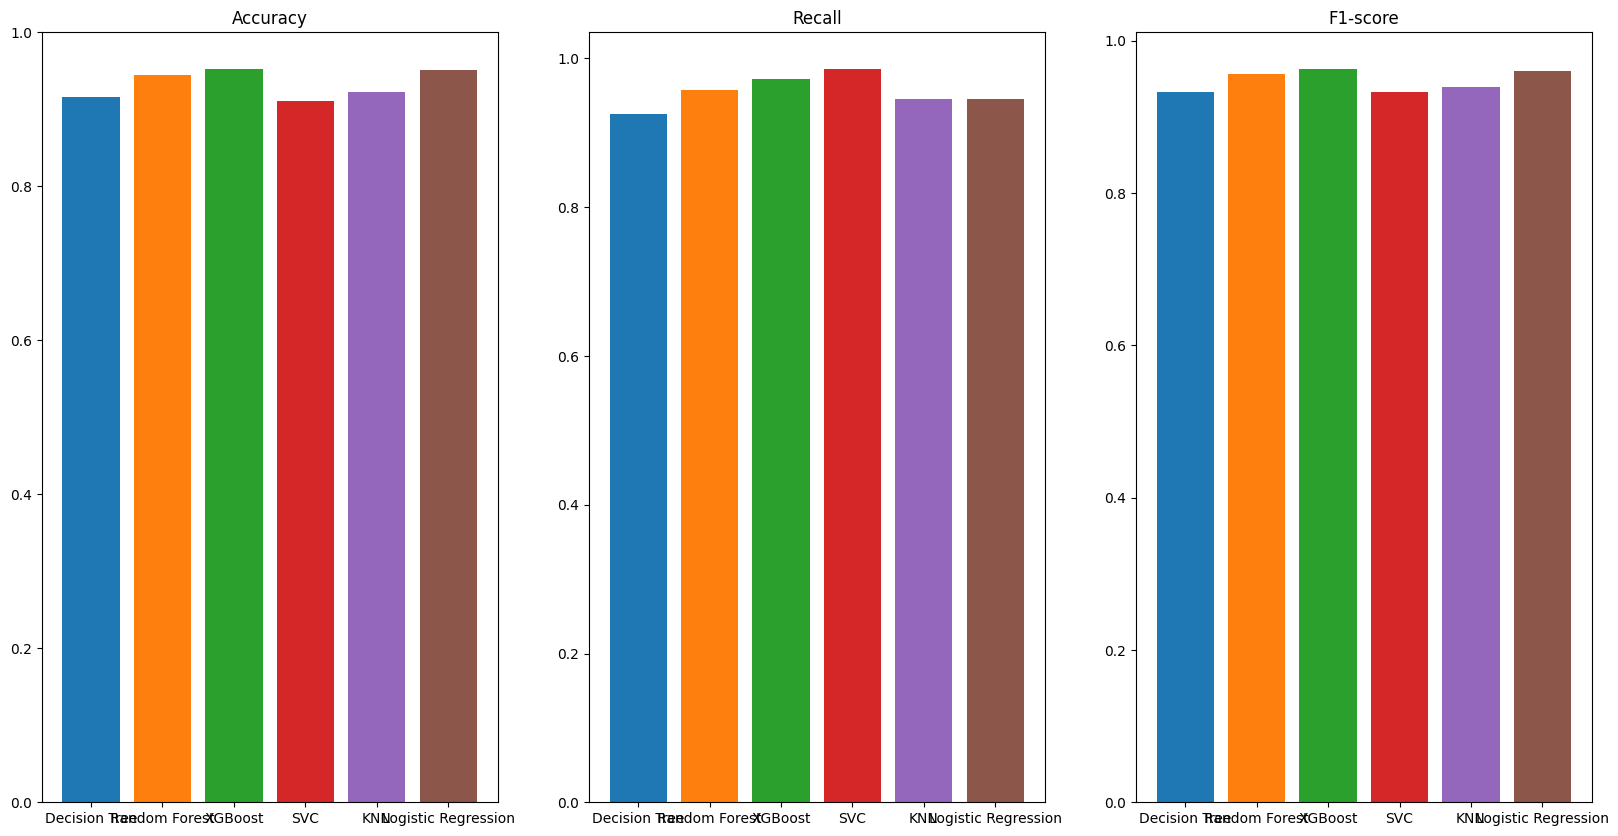

In [20]:
import matplotlib.pyplot as plt

# Calculate the average performance of each model for each metric
avg_performance = {}
for model_name, performance in model_performance.items():
    avg_performance[model_name] = {}
    for metric, values in performance.items():
        avg_performance[model_name][metric] = sum(values) / len(values)

# Plot the average performance of each model for each metric
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
for i, metric in enumerate(['Accuracy', 'Recall', 'F1-score']):
    axs[i].set_title(metric)
    for model_name, performance in avg_performance.items():
        axs[i].bar(model_name, performance[metric])
plt.show()

In [21]:
best_split = {}
for model_name, performance in model_performance.items():
    best_split[model_name] = {}
    best_avg_performance = 0
    for i, train_size in enumerate(train_sizes):
        avg_performance = (performance['Accuracy'][i] + performance['Recall'][i] + performance['F1-score'][i]) / 3
        if avg_performance > best_avg_performance:
            best_avg_performance = avg_performance
            best_split[model_name]['Train size'] = train_size
            best_split[model_name]['Test size'] = 100 - train_size
            best_split[model_name]['Avg performance'] = best_avg_performance

# Print the results
for model_name, split in best_split.items():
    print(f'{model_name}: Train size={split["Train size"]}, Test size={split["Test size"]}, Avg performance={split["Avg performance"]:.2f}')

Decision Tree: Train size=95, Test size=5, Avg performance=0.96
Random Forest: Train size=75, Test size=25, Avg performance=0.97
XGBoost: Train size=80, Test size=20, Avg performance=0.99
SVC: Train size=75, Test size=25, Avg performance=0.96
KNN: Train size=60, Test size=40, Avg performance=0.96
Logistic Regression: Train size=60, Test size=40, Avg performance=0.97


## According to the result of 3-b, please find the important features for these six classification models and draw the corresponding figure by descending order.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the feature importances for each model
feature_importances = {}
for model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
    feature_importances[model_name] = models[model_name].feature_importances_

# Create a DataFrame with the feature importances
column_names = [f'Feature {i}' for i in range(X.shape[1])]
df = pd.DataFrame(feature_importances, index=column_names)

# Plot the feature importances for each model
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# for i, model_name in enumerate(['Decision Tree', 'Random Forest', 'XGBoost']):
#     axs[i].set_title(model_name)
#     df[model_name].sort_values(ascending=False).plot.bar(ax=axs[i])
# plt.show()

# Print the top 3 important features for each model
for model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
    print(f'{model_name}:')
    print(df[model_name].sort_values(ascending=False).head(3))
    print()

Decision Tree:
Feature 7     1.0
Feature 0     0.0
Feature 16    0.0
Name: Decision Tree, dtype: float64

Random Forest:
Feature 7     0.176556
Feature 22    0.144181
Feature 27    0.130188
Name: Random Forest, dtype: float64

XGBoost:
Feature 7     0.889295
Feature 27    0.110705
Feature 0     0.000000
Name: XGBoost, dtype: float32

